In [224]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import glob

In [225]:
## uni = file name
uni = ""

path = "/home/chyoo/work/KNO_reconstruction/KNO_vertex/result/*" + uni +"*/train.csv"
train_path = glob.glob(path)
train_list = [file for file in train_path if file.endswith(".csv")]

In [226]:
for i in range(len(train_list)):
    print(np.sort(np.array(train_list))[i].split('/')[-2])

KPS_result
cross_small_test
inf_test
khu_test_16f_4h_200n_5l_fullpmt
khu_test_16f_4h_200n_9l_fullpmt
khu_test_16f_4h_500n_5l_fullpmt
khu_test_32f_8h_500n_7l_m_rev
khu_test_64f_8h_500n_3l_m
khu_test_64f_8h_500n_5l_m
khu_test_64f_8h_500n_5l_m_rev
khu_test_64f_8h_500n_7l_m
memory_test
multi_test
vtx_00_64f_4h_200n_2l
vtx_00_cut_10f_2h_500n
vtx_00_cut_64f_16h_200n
vtx_16f_2h_1000n_20l_max_notime_0417
vtx_16f_2h_1000n_20l_only_q_0417
vtx_16f_4h_1000n_5l_0325
vtx_16f_4h_1000n_7l_0404
vtx_16f_4h_2000n_5l_0325
vtx_16f_4h_200n_5l_0325
vtx_16f_4h_500n_7l_0325
vtx_16f_4h_500n_7l_0404
vtx_16f_4h_500n_7l_0404_trans
vtx_32f_8h_1000n_7l_0403
vtx_32f_8h_1000n_7l_0404
vtx_4f_1h_2000n_20l_0417
vtx_5f_1h_1000n_20l_0417
vtx_5f_1h_1000n_20l_max_0417
vtx_kisti_test_0404
vtx_padding_test
vtx_selec_128f_16h_100n_7l
vtx_selec_128f_16h_100n_7l_trans
vtx_selec_128f_16h_100n_7l_trans_v2
vtx_selec_128f_16h_200n_7l
vtx_selec_128f_16h_200n_7l_trans
vtx_selec_64f_4h_200n_2l
vtx_selec_64f_4h_200n_2l_trans
vtx_selec_64

In [227]:
train_list = [

 '/home/chyoo/work/KNO_reconstruction/KNO_vertex/result/KPS_result/train.csv',
  
  '/home/chyoo/work/KNO_reconstruction/KNO_vertex/result/vtx_type3_normal_model_norm_false_200n_f32_h4_3l_cf32_events1008031/train.csv',
  
 
  '/home/chyoo/work/KNO_reconstruction/KNO_vertex/result/vtx_type3_inf_normal_model_norm_false_200n_f32_h4_3l_cf32_events1008031/train.csv',
   '/home/chyoo/work/KNO_reconstruction/KNO_vertex/result/vtx_type3_two_cross_normal_model_norm_false_3000n_f10_h2_200n_f128_h8_3l_events1008031/train.csv',
]
 




#   '/home/chyoo/work/KNO_reconstruction/KNO_vertex/result/KPS_result/train.csv']

0 2  /  MTL = 1041.2025223  /  MTL epoch = 0000  /  1106.3904974  /  MVL = 1106.3904974  /  MVL epoch = 0000  /  vtx_type3_no_inf_small_cross_200n_f1024_h16_5l_cf32_ch4_events1008031
1 423  /  MTL = 10.1892292  /  MTL epoch = 0417  /  48.7546734  /  MVL = 48.7546734  /  MVL epoch = 0381  /  KPS_result
2 4  /  MTL = 996.8013024  /  MTL epoch = 0001  /  981.7625736  /  MVL = 981.7625736  /  MVL epoch = 0001  /  vtx_type3_small_cross_200n_f1024_h16_5l_cf32_ch4_events1008031
3 2  /  MTL = 1072.5045709  /  MTL epoch = 0001  /  1055.2440145  /  MVL = 1055.2440145  /  MVL epoch = 0001  /  vtx_type3_small_cross_200n_f1024_h16_15l_cf32_ch4_events1008031


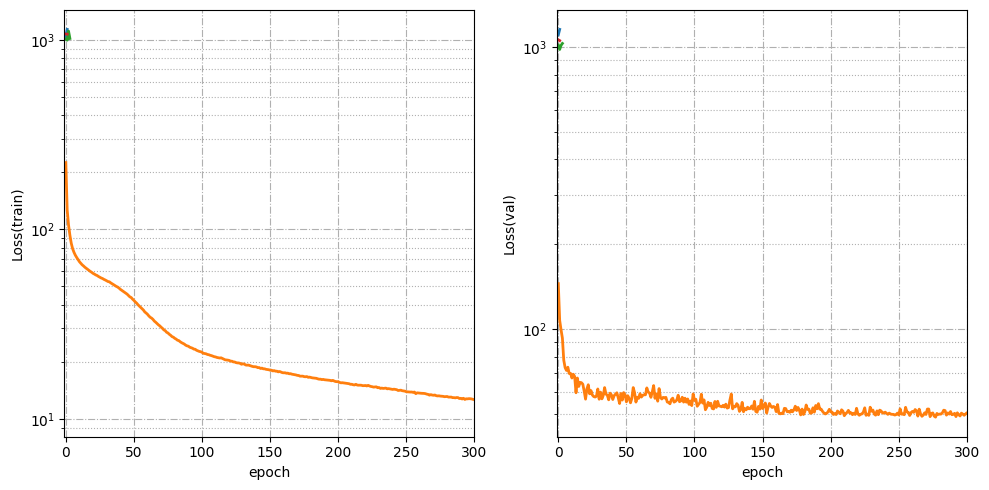

In [228]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams["legend.loc"] = 'upper right'
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.loc"] = 'upper left'

ax1 = plt.subplot(1, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(1, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')

for ax in (ax1, ax2):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([-1,300])

lines, labels = [], []

for i in range(len(train_list)):
    df = pd.read_csv(train_list[i])
    
    label = train_list[i]
    # label = labelss[i]
    l =  ax1.plot(df['loss'], linewidth=2) 
    ax2.plot(df['val_loss'], linewidth=2,label=label.split('/')[-2])
    # ax2.plot(df['val_loss'], linewidth=2,label=label)
    
    # if df['val_loss'][0] < 250:

    #     print(df['val_loss'][0])
    #     print(label)
    print(i,
        len(df['loss']),
        ' / ',
        "MTL = " + f"{df['loss'].min():.7f}",
        " / ",
        "MTL epoch = " + str("{:04}".format(np.where(df['loss']==df['loss'].min())[0][0])),
        " / ",
        f"{df['val_loss'].min():.7f}",
        " / ",
        "MVL = " + f"{df['val_loss'].min():.7f}",
        " / ",
        "MVL epoch = " + str("{:04}".format(np.where(df['val_loss']==df['val_loss'].min())[0][0])),
        " / ",
        # labelss)
        label.split('/')[-2])

    lines.append(l[0])
    labels.append(label)
plt.tight_layout()
# plt.savefig('acc_loss.png',dpi=300)
# plt.legend()
plt.show()
plt.close()

In [229]:
# plt.rcParams['figure.figsize'] = (10, 5)
# plt.rcParams['lines.linewidth'] = 1
# plt.rcParams['lines.markersize'] = 5
# plt.rcParams["legend.loc"] = 'upper right'
# plt.rcParams["legend.frameon"] = False
# plt.rcParams["legend.loc"] = 'upper left'

# ax1 = plt.subplot(1, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
# ax2 = plt.subplot(1, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')

# for ax in (ax1, ax2):
#     ax.grid(which='major', axis='both', linestyle='-.')
#     ax.grid(which='minor', linestyle=':')
#     ax.set_xlim([-1,300])

# lines, labels = [], []

# for i in range(len(train_list)):
#     df = pd.read_csv(train_list[i])
#     if df['val_loss'][0] < 250:
#         label = train_list[i]
#         # label = labelss[i]
#         l =  ax1.plot(df['loss'], linewidth=2) 
#         ax2.plot(df['val_loss'], linewidth=2,label=label.split('/')[-2])
#         # ax2.plot(df['val_loss'], linewidth=2,label=label)
        
#         # if df['val_loss'][0] < 250:

#         #     print(df['val_loss'][0])
#         #     print(label)
#         print(i,
#             len(df['loss']),
#             ' / ',
#             "MTL = " + f"{df['loss'].min():.7f}",
#             " / ",
#             "MTL epoch = " + str("{:04}".format(np.where(df['loss']==df['loss'].min())[0][0])),
#             " / ",
#             f"{df['val_loss'].min():.7f}",
#             " / ",
#             "MVL = " + f"{df['val_loss'].min():.7f}",
#             " / ",
#             "MVL epoch = " + str("{:04}".format(np.where(df['val_loss']==df['val_loss'].min())[0][0])),
#             " / ",
#             # labelss)
#             label.split('/')[-2])

#         lines.append(l[0])
#         labels.append(label)
# plt.tight_layout()
# # plt.savefig('acc_loss.png',dpi=300)
# plt.legend()
# plt.show()
# plt.close()